In [5]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 6.9 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/8.1 MB 6.8 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 6.8 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 6.8 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------------------- -------------------- 1.3/2.7 MB 6.7 MB/s eta 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Import pandas, numpy, and matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Matplotlib is used by pandas plotting

#### 1. Prepare Sample Data

In [10]:
#Time series data
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=100)
ts_df = pd.DataFrame(np.random.randn(100, 3).cumsum(axis=0), # Cumulative sum to make trends visible
                     columns=['SeriesA', 'SeriesB', 'SeriesC'],
                     index=dates)
print("--- Sample Time Series DataFrame (first 5 rows) ---")
print(ts_df.head())

--- Sample Time Series DataFrame (first 5 rows) ---
             SeriesA   SeriesB   SeriesC
2024-01-01  0.496714 -0.138264  0.647689
2024-01-02  2.019744 -0.372418  0.413552
2024-01-03  3.598957  0.395017 -0.055923
2024-01-04  4.141517 -0.068401 -0.521653
2024-01-05  4.383479 -1.981681 -2.246570


In [11]:
# Categorical/Numerical data
data_cat = {
    'Category': np.random.choice(['X', 'Y', 'Z', 'W'], 100),
    'Value1': np.random.rand(100) * 100,
    'Value2': np.random.normal(50, 15, 100),
    'Count': np.random.randint(1, 10, 100)
}
df_cat = pd.DataFrame(data_cat)
print("\n--- Sample Categorical/Numerical DataFrame (first 5 rows) ---")
print(df_cat.head())


--- Sample Categorical/Numerical DataFrame (first 5 rows) ---
  Category     Value1     Value2  Count
0        X   7.276301  43.249018      6
1        W  82.186006  59.342749      5
2        Y  70.624223  33.985694      6
3        X   8.134878  47.864308      6
4        X   8.483771  51.804434      7


In [13]:
# --- Make sure plots are displayed (in environments like Jupyter) ---
# %matplotlib inline # Uncomment if in Jupyter or similar environment

#### 2. Basic Plotting with .plot()

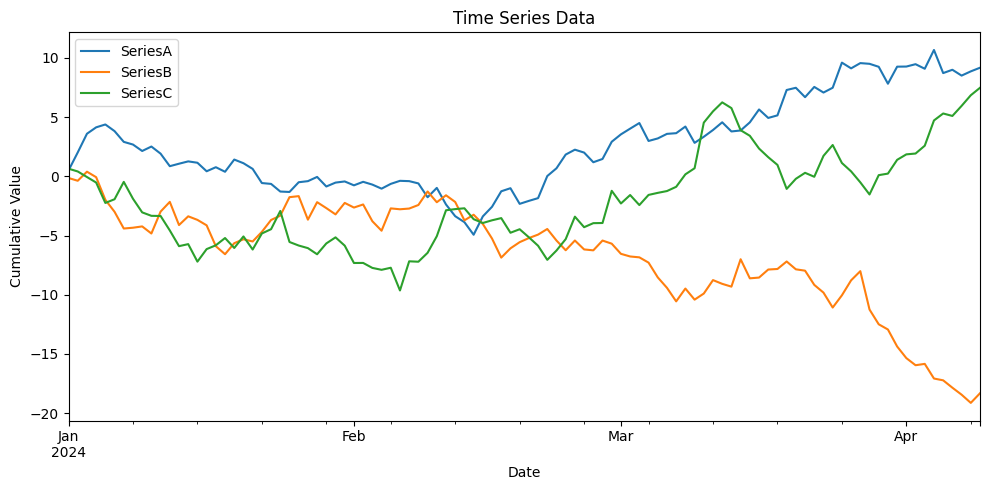

Generated Line Plot for Time Series.


In [14]:
# a) Line Plot (default for Series and DataFrame with numeric data)
# Useful for time series or showing trends over continuous variable.
ts_plot = ts_df.plot(
    figsize=(10, 5), # Set figure size (width, height in inches)
    title='Time Series Data',
    xlabel='Date',
    ylabel='Cumulative Value'
)
plt.tight_layout() # Adjust layout
plt.show() # Explicitly show plot (good practice outside notebooks)
print("Generated Line Plot for Time Series.")

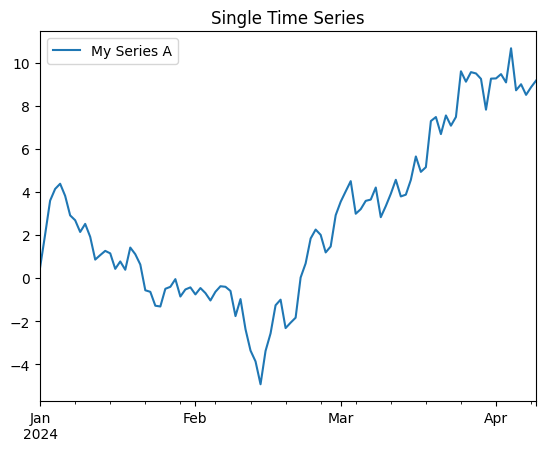

Generated Line Plot for single Series.


In [15]:
# Plot a single Series
ts_df['SeriesA'].plot(legend=True, label='My Series A', title='Single Time Series')
plt.show()
print("Generated Line Plot for single Series.")


Mean Value1 per Category:
 Category
W    60.498604
X    53.336882
Y    44.931083
Z    63.639074
Name: Value1, dtype: float64


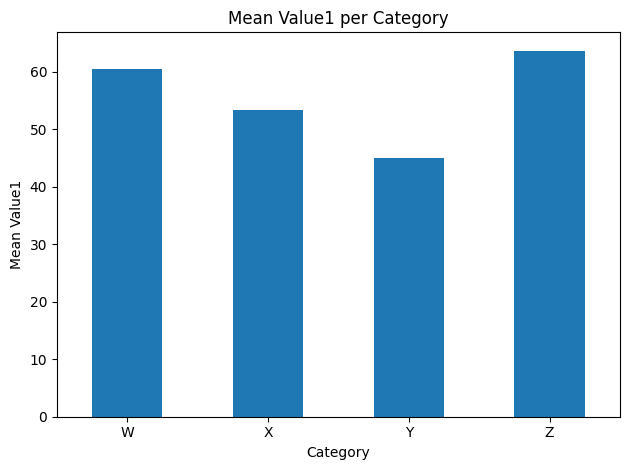

Generated Bar Plot for Category Means.


In [16]:
# b) Bar Plot (kind='bar' or kind='barh')
# Useful for comparing categorical data or discrete values.

# Aggregate data first for a meaningful bar plot
category_means = df_cat.groupby('Category')['Value1'].mean()
print("\nMean Value1 per Category:\n", category_means)

bar_plot = category_means.plot(
    kind='bar',
    title='Mean Value1 per Category',
    xlabel='Category',
    ylabel='Mean Value1',
    rot=0 # Rotation for x-axis labels
)
plt.tight_layout()
plt.show()
print("Generated Bar Plot for Category Means.")

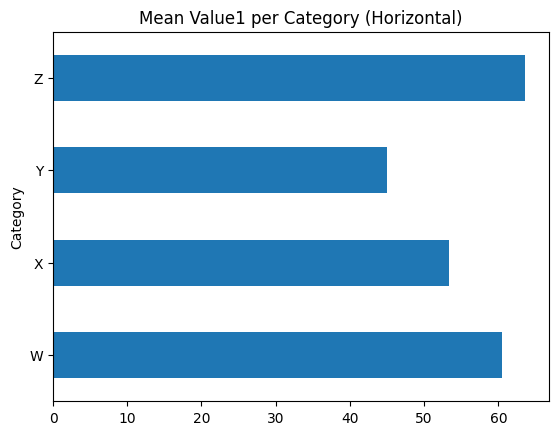

Generated Horizontal Bar Plot.


In [17]:
# Horizontal bar plot
barh_plot = category_means.plot(kind='barh', title='Mean Value1 per Category (Horizontal)')
plt.show()
print("Generated Horizontal Bar Plot.")

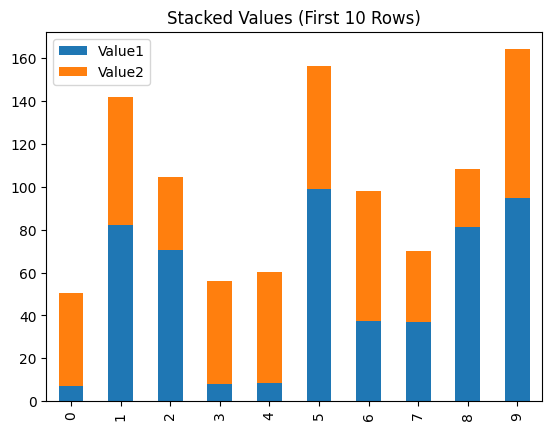

Generated Stacked Bar Plot.


In [18]:
# Stacked bar plot from DataFrame columns
df_cat_subset = df_cat.head(10)[['Value1', 'Value2']] # Use a subset for clarity
stacked_bar = df_cat_subset.plot(kind='bar', stacked=True, title='Stacked Values (First 10 Rows)')
plt.show()
print("Generated Stacked Bar Plot.")

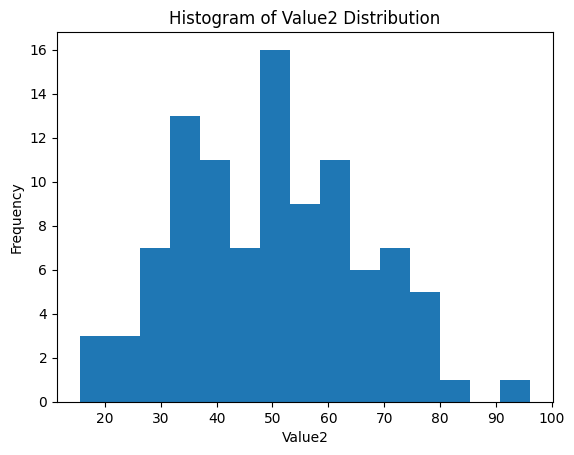

Generated Histogram for Value2.


In [19]:
# c) Histogram (kind='hist')
# Shows the distribution of a single numerical variable.
hist_plot = df_cat['Value2'].plot(
    kind='hist',
    bins=15, # Number of bins
    title='Histogram of Value2 Distribution',
    xlabel='Value2'
)
plt.show()
print("Generated Histogram for Value2.")


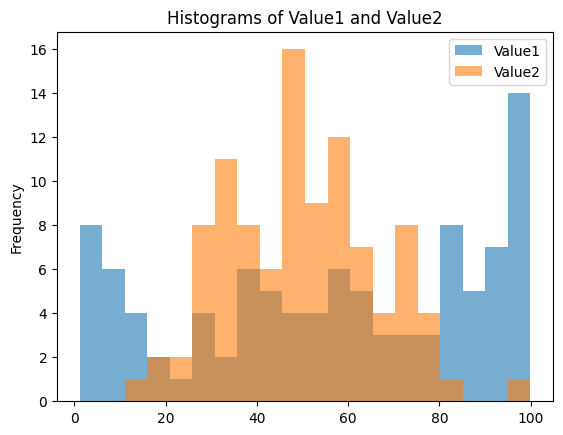

Generated Overlaid Histograms for Value1 & Value2.


In [20]:
# Plot histograms for multiple columns
hist_multi = df_cat[['Value1', 'Value2']].plot(
    kind='hist',
    alpha=0.6, # Transparency
    bins=20,
    title='Histograms of Value1 and Value2'
)
plt.show()
print("Generated Overlaid Histograms for Value1 & Value2.")


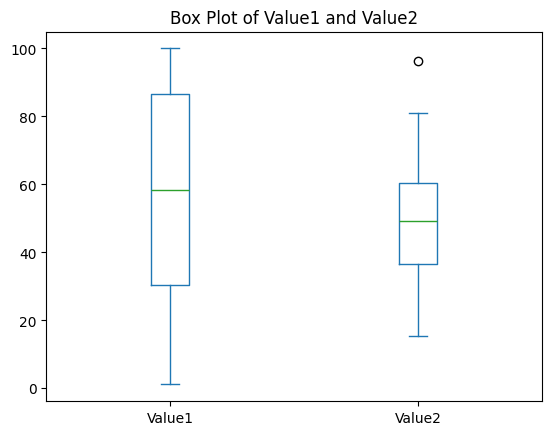

Generated Box Plot for Value1 & Value2.


In [21]:
# d) Box Plot (kind='box')
# Shows distribution, median, quartiles, and outliers.
box_plot = df_cat[['Value1', 'Value2']].plot(
    kind='box',
    title='Box Plot of Value1 and Value2'
)
plt.show()
print("Generated Box Plot for Value1 & Value2.")

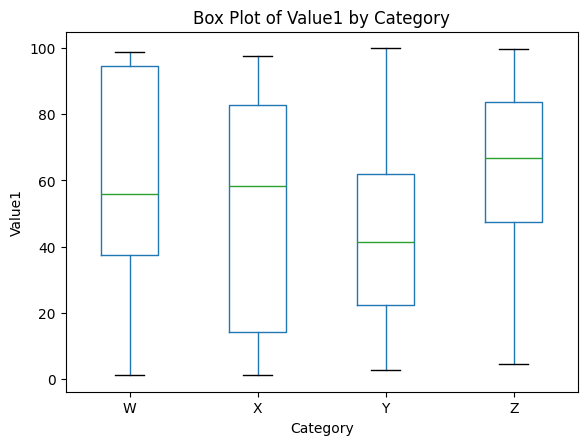

Generated Box Plot of Value1 grouped by Category.


In [22]:
# Box plot grouped by category
box_grouped = df_cat.boxplot(column='Value1', by='Category', grid=False) # Use df.boxplot() for 'by'
plt.suptitle('') # Remove default suptitle added by boxplot(by=...)
plt.title('Box Plot of Value1 by Category')
plt.xlabel('Category')
plt.ylabel('Value1')
plt.show()
print("Generated Box Plot of Value1 grouped by Category.")

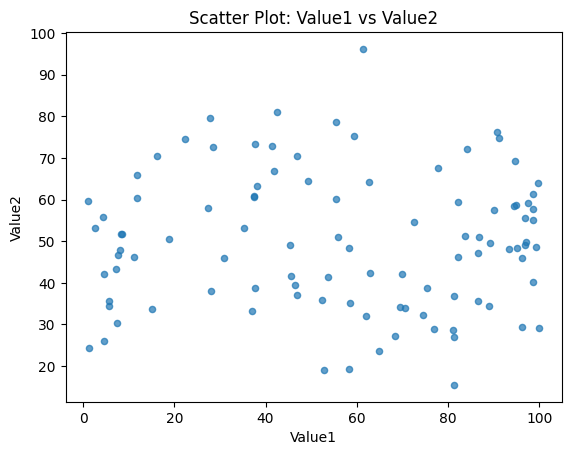

Generated Scatter Plot for Value1 vs Value2.


In [23]:
# e) Scatter Plot (kind='scatter')
# Shows the relationship between two numerical variables.
scatter_plot = df_cat.plot(
    kind='scatter',
    x='Value1',
    y='Value2',
    title='Scatter Plot: Value1 vs Value2',
    alpha=0.7 # Transparency
)
plt.show()
print("Generated Scatter Plot for Value1 vs Value2.")

In [24]:
# Scatter plot with color based on a third variable (requires matplotlib directly for legend)
# plt.figure() # Start new figure
# categories = df_cat['Category'].astype('category').cat.codes # Get numeric codes for colors
# scatter = plt.scatter(df_cat['Value1'], df_cat['Value2'], c=categories, cmap='viridis', alpha=0.7)
# plt.title('Scatter Plot with Color by Category')
# plt.xlabel('Value1')
# plt.ylabel('Value2')
# plt.colorbar(scatter, label='Category Code') # Add color bar
# plt.show()
# print("Generated Scatter Plot with Color by Category (using matplotlib).")

In [30]:
#Time series data
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=100)
ts_df = pd.DataFrame(np.random.rand(100, 3).cumsum(axis=0), # Cumulative sum to make trends visible
                     columns=['SeriesA', 'SeriesB', 'SeriesC'],
                     index=dates)
print("--- Sample Time Series DataFrame (first 5 rows) ---")
print(ts_df.head())

--- Sample Time Series DataFrame (first 5 rows) ---
             SeriesA   SeriesB   SeriesC
2024-01-01  0.374540  0.950714  0.731994
2024-01-02  0.973199  1.106733  0.887988
2024-01-03  1.031282  1.972909  1.489103
2024-01-04  1.739355  1.993494  2.459013
2024-01-05  2.571797  2.205833  2.640838


Generated Stacked Area Plot.


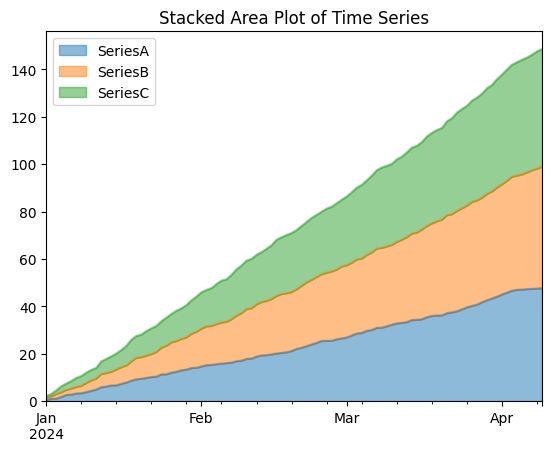

In [31]:
# f) Area Plot (kind='area')
# Like line plot, but fills area below lines. Useful for stacked trends.
# Data in ts_df is now guaranteed non-negative due to data generation change.
area_plot = ts_df.plot(
    kind='area',
    stacked=True, # Default is True for area plots
    alpha=0.5,
    title='Stacked Area Plot of Time Series'
)
# plt.show()
print("Generated Stacked Area Plot.")


Category Counts:
 Category
X    32
Z    26
W    25
Y    17
Name: count, dtype: int64
Generated Pie Chart.


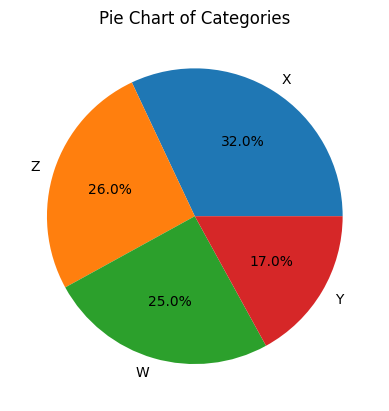

In [32]:
# g) Pie Plot (kind='pie')
# Shows proportions of categories. Use cautiously, often bar charts are better.
category_counts = df_cat['Category'].value_counts()
print("\nCategory Counts:\n", category_counts)
pie_plot = category_counts.plot(
    kind='pie',
    autopct='%1.1f%%', # Format for percentage labels
    title='Pie Chart of Categories',
    ylabel='' # Remove default y-label
)
# plt.show()
print("Generated Pie Chart.")

In [39]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Generated KDE Plot for Value2.


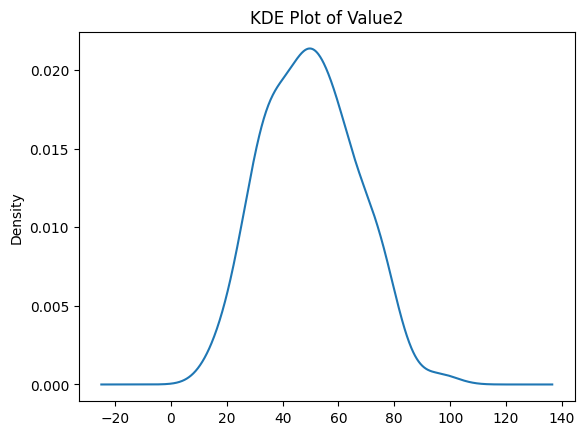

In [40]:
# h) Kernel Density Estimate (KDE) Plot (kind='kde' or kind='density')
# Smoothed version of histogram, estimates probability density function.
kde_plot = df_cat['Value2'].plot(
    kind='kde',
    title='KDE Plot of Value2'
)
# plt.show()
print("Generated KDE Plot for Value2.")

#### 3. Customization & Integration
- Pass arguments accepted by the underlying Matplotlib functions (e.g., figsize, title, xlabel, ylabel, color, style, logy, grid).
- For more advanced plots or fine-grained control, use Matplotlib or Seaborn directly, often passing Pandas Series/DataFrames as data inputs.

In [41]:
# Clean up plot windows if necessary (depends on environment)
plt.show() # Show all plots generated in the script at the end
# plt.close('all') # Uncomment to close all plot windows after showing